# Kernel Density Estimation

Before running the code, you should install the `sklearn` package. Type in a code cell in the notebook:
```
!pip install sklearn
```

In [1]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm, uniform

In [3]:
from scipy.stats import uniform

In [4]:
uniform.pdf([.3,1.2])

array([1., 0.])

In [5]:
np.linspace(-1,2,50)

array([-1.        , -0.93877551, -0.87755102, -0.81632653, -0.75510204,
       -0.69387755, -0.63265306, -0.57142857, -0.51020408, -0.44897959,
       -0.3877551 , -0.32653061, -0.26530612, -0.20408163, -0.14285714,
       -0.08163265, -0.02040816,  0.04081633,  0.10204082,  0.16326531,
        0.2244898 ,  0.28571429,  0.34693878,  0.40816327,  0.46938776,
        0.53061224,  0.59183673,  0.65306122,  0.71428571,  0.7755102 ,
        0.83673469,  0.89795918,  0.95918367,  1.02040816,  1.08163265,
        1.14285714,  1.20408163,  1.26530612,  1.32653061,  1.3877551 ,
        1.44897959,  1.51020408,  1.57142857,  1.63265306,  1.69387755,
        1.75510204,  1.81632653,  1.87755102,  1.93877551,  2.        ])

In [6]:
%matplotlib inline

In [7]:
def kde_sklearn(x, x_grid, bandwidth=0.2, kernel='gaussian', **kwargs):
    """Kernel Density Estimation with Scikit-learn
    valid kernels are ['gaussian'|'tophat'|'epanechnikov'|'exponential'|'linear'|'cosine']
    the default kernel is 'gaussian'"""
    kde_skl = KernelDensity(bandwidth=bandwidth, kernel=kernel, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [8]:
def silverman_rule(x):
    # interquartile range
    iqr = np.percentile(x,75) - np.percentile(x,25)
    # optimal bandwidth
    h = 0.9 * min(np.std(x), iqr/1.34) * len(x)**(-0.2)
    return h

In [9]:
def scott_rule(x):
    # interquartile range
    iqr = np.percentile(x,75) - np.percentile(x,25)
    # optimal bandwidth
    h = 1.059 * min(np.std(x), iqr/1.34) * len(x)**(-0.2)
    return h

In [10]:
n_observations = 5000
x = np.random.randn(n_observations) + np.random.choice([0,3],size=n_observations,p=[.6,.4])

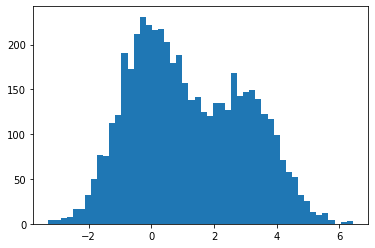

In [11]:
plt.hist(x, bins=50);

In [12]:
x_grid = np.linspace(-4,6,1000)

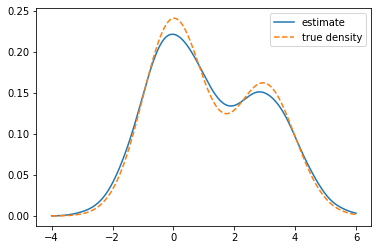

In [13]:
pdf = kde_sklearn(x, x_grid, bandwidth=scott_rule(x))
plt.plot(x_grid, pdf, label='estimate')
plt.plot(x_grid, .6*norm.pdf(x_grid) + .4 *norm.pdf(x_grid-3), label='true density',linestyle='--')
plt.legend()

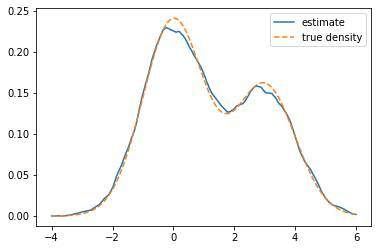

In [14]:
pdf = kde_sklearn(x, x_grid, bandwidth=scott_rule(x), kernel='epanechnikov')
plt.plot(x_grid, pdf, label='estimate')
plt.plot(x_grid, .6*norm.pdf(x_grid) + .4 *norm.pdf(x_grid-3), label='true density',linestyle='--')
plt.legend();

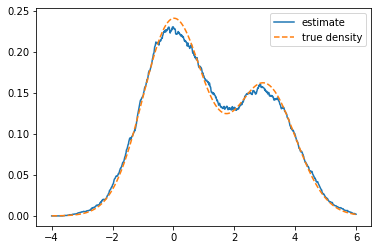

In [15]:
pdf = kde_sklearn(x, x_grid, bandwidth=scott_rule(x), kernel='tophat')
plt.plot(x_grid, pdf, label='estimate')
plt.plot(x_grid, .6*norm.pdf(x_grid) + .4 *norm.pdf(x_grid-3), label='true density',linestyle='--')
plt.legend();

## Exercise 1

Generate 10000 random numbers for a random variable $X = Y + Z$ where $Y$ in uniform on $[0,1]$ and $Z$ takes the value 0 with probability $0.7$ and the value 0.5 with probability $0.3$. 
 1. Plot a histogram of the empirical distribution of $X$.
 2. Construct a kernel density estimator for $X$.
 3. Compute the empirical cdf for $X$. (Hint computing the empirical cdf is implemented in the function `ECDF` in `statsmodels.distributions.empirical_distribution`.)

In [16]:
n_observations = 10000
Y = np.random.rand(n_observations)
Z = np.random.choice([0,.5], size=n_observations, p=[.7,.3])
X = Y+Z

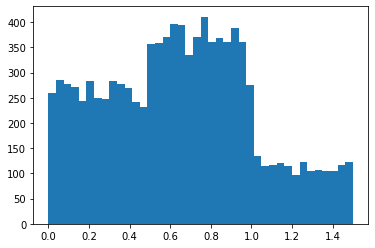

In [17]:
plt.hist(X, bins=40);

In [18]:
x_grid = np.linspace(-.5, 2, 1000)

In [19]:
pdf = kde_sklearn(X, x_grid, bandwidth=silverman_rule(X))

In [20]:
true_pdf = .7*uniform.pdf(x_grid) + .3*uniform.pdf(x_grid-.5)

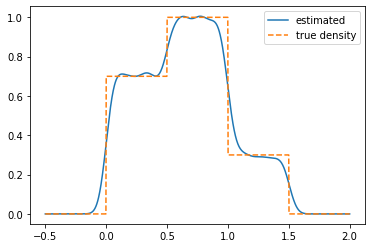

In [21]:
plt.plot(x_grid, pdf, label='estimated')
plt.plot(x_grid,true_pdf, 
         linestyle='--', label='true density')
plt.legend();

In [22]:
from statsmodels.distributions.empirical_distribution import ECDF

In [23]:
ecdf = ECDF(X)
true_cdf = .7*uniform.cdf(x_grid) + .3*uniform(loc=.5).cdf(x_grid)

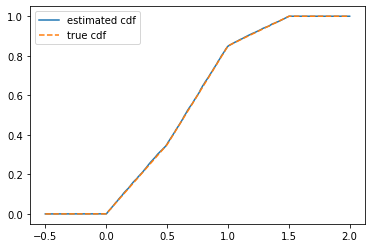

In [24]:
plt.plot(x_grid, ecdf(x_grid), label='estimated cdf')
plt.plot(x_grid, true_cdf, label='true cdf', linestyle='--')
plt.legend();

## Exercise 2

Generate random bids from a first-price auction with 2 bidders. Assume that bidders are symmetric and their valuations $V_i$ are drawn from a uniform distribution on $[0,1]$ for $i=1,2$.
1. Plot a histogram of the bid distribution.
2. Use the Guerre-Perrigne-Vuong estimator to estimate the distribution of pseudo-valuations from the distribution of bids. Plot a histogram of the distribution of pseudo-valuations.
3. Construct a kernel density estimator for the distribution of pseudo-valuations. Also compute the empirical cdf.

In [25]:
n_observations = 10000
V1 = np.random.rand(n_observations)
V2 = np.random.rand(n_observations)

In [26]:
# generate bids from valuations
B1 = V1/2
B2 = V2/2

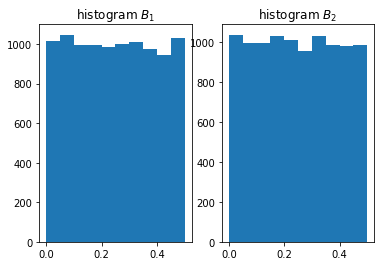

In [27]:
plt.subplot(121)
plt.hist(B1)
plt.title('histogram $B_1$')
plt.subplot(122)
plt.hist(B2)
plt.title('histogram $B_2$');

In [28]:
used_kernel = 'gaussian'

Estimate density of B2, evaluated at points B1, 
i.e. pdf_2($B_{1,i}$) for i=1,...,n_observations

In [29]:
pdf2_B1 = kde_sklearn(B2, B1, bandwidth=scott_rule(B2), kernel=used_kernel)

Estimate cdf of B2, evaluated at points B1

In [30]:
cdf2_B1 = ECDF(B2)(B1)

Estimate density and cdf of B2 evaluated at points B1

In [31]:
pdf1_B2 = kde_sklearn(B1, B2, bandwidth=scott_rule(B2), kernel=used_kernel)
cdf1_B2 = ECDF(B1)(B2)

Plot estimated densities and cdfs

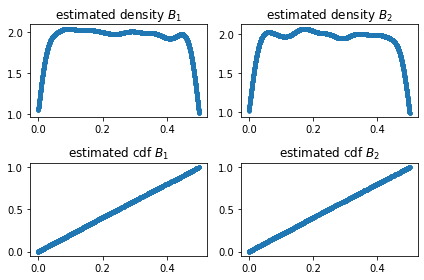

In [32]:
plt.subplot(221)
plt.plot(B2, pdf1_B2, '.')
plt.title('estimated density $B_1$')
plt.subplot(222)
plt.plot(B1, pdf2_B1, '.')
plt.title('estimated density $B_2$')
plt.subplot(223)
plt.plot(B2, cdf1_B2, '.')
plt.title('estimated cdf $B_1$')
plt.subplot(224)
plt.plot(B1, cdf2_B1, '.')
plt.title('estimated cdf $B_2$')
plt.tight_layout();

Compute pseudo-valuations $\hat V_{1,i}$ and $\hat V_{2,i}$ for i=1,...,n_observations

In [33]:
V1hat = B1 + cdf2_B1/pdf2_B1
V2hat = B2 + cdf1_B2/pdf1_B2

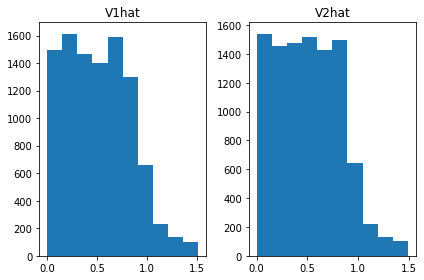

In [34]:
plt.subplot(121)
plt.hist(V1hat)
plt.title('V1hat')
plt.subplot(122)
plt.hist(V2hat)
plt.title('V2hat')
plt.tight_layout();

In [35]:
v_grid = np.linspace(-.5,1.5,1000)

Estimate density and cdf of $\hat V_1$

In [36]:
pdf1hat = kde_sklearn(V1hat, v_grid, bandwidth=scott_rule(V1hat), kernel=used_kernel)
cdf1hat = ECDF(V1hat)(v_grid)

Estimate density and cdf of $\hat V_2$

In [37]:
pdf2hat = kde_sklearn(V2hat, v_grid, bandwidth=scott_rule(V2hat), kernel=used_kernel)
cdf2hat = ECDF(V2hat)(v_grid)

Plot estimated densities and cdfs of $\hat V_1$ and $\hat V_2$

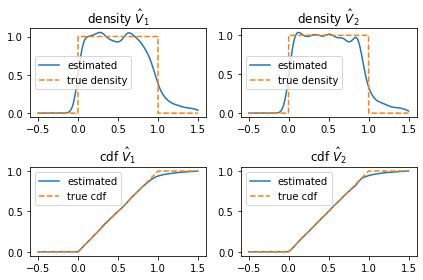

In [38]:
plt.subplot(221)
plt.plot(v_grid, pdf1hat, label='estimated')
plt.plot(v_grid, uniform.pdf(v_grid), label='true density', linestyle='--')
plt.legend()
plt.title('density $\\hat V_1$')
plt.subplot(222)
plt.plot(v_grid, pdf2hat, label='estimated')
plt.plot(v_grid, uniform.pdf(v_grid), label='true density', linestyle='--')
plt.legend()
plt.title('density $\\hat V_2$')
plt.subplot(223)
plt.plot(v_grid, cdf1hat, label='estimated')
plt.plot(v_grid, uniform.cdf(v_grid), label='true cdf', linestyle='--')
plt.legend()
plt.title('cdf $\\hat V_1$')
plt.subplot(224)
plt.plot(v_grid, cdf2hat, label='estimated')
plt.plot(v_grid, uniform.cdf(v_grid), label='true cdf', linestyle='--')
plt.legend()
plt.title('cdf $\\hat V_2$')
plt.tight_layout();